In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [4]:
from feature_engine.discretisation import EqualWidthDiscretiser

In [3]:
# Load dataset
X, y = fetch_openml(name='house_prices', version=1, return_X_y=True, as_frame=True)
X.set_index('Id', inplace=True)

# Separate into train and test sets
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# List the target numeric variables for equal-width discretization
TARGET_NUMERIC_FEATURES= ['LotArea','GrLivArea']

# Set up the discretization transformer
disc = EqualWidthDiscretiser(bins=10, variables=TARGET_NUMERIC_FEATURES)

# Fit the transformer
disc.fit(X_train)

EqualWidthDiscretiser(variables=['LotArea', 'GrLivArea'])

In [6]:
disc.binner_dict_

{'LotArea': [-inf,
  22694.5,
  44089.0,
  65483.5,
  86878.0,
  108272.5,
  129667.0,
  151061.5,
  172456.0,
  193850.5,
  inf],
 'GrLivArea': [-inf,
  864.8,
  1395.6,
  1926.3999999999999,
  2457.2,
  2988.0,
  3518.7999999999997,
  4049.5999999999995,
  4580.4,
  5111.2,
  inf]}

In [7]:
train_t= disc.fit_transform(X_train)
test_t = disc.fit_transform(X_test)

In [8]:
disc.binner_dict_

{'LotArea': [-inf,
  8418.0,
  15345.0,
  22272.0,
  29199.0,
  36126.0,
  43053.0,
  49980.0,
  56907.0,
  63834.0,
  inf],
 'GrLivArea': [-inf,
  863.6,
  1247.2,
  1630.8000000000002,
  2014.4,
  2398.0,
  2781.6000000000004,
  3165.2000000000003,
  3548.8,
  3932.4,
  inf]}

In [10]:
X_train[TARGET_NUMERIC_FEATURES].head()

,LotArea,GrLivArea
Id,,
136,10400,1682
1453,3675,1072
763,8640,1547
933,11670,1905
436,10667,1661


In [11]:
X_test[TARGET_NUMERIC_FEATURES].head()

,LotArea,GrLivArea
Id,,
893,8414,1068
1106,12256,2622
414,8960,1028
523,5000,1664
1037,12898,1620


In [14]:
train_t[TARGET_NUMERIC_FEATURES].head()

,LotArea,GrLivArea
Id,,
136,0,2
1453,0,1
763,0,2
933,0,2
436,0,2


<Axes: xlabel='GrLivArea'>

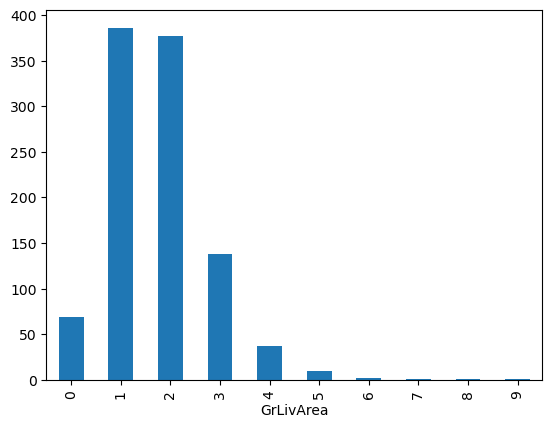

In [15]:
train_t['GrLivArea'].value_counts().sort_index().plot.bar()

In [16]:
train_t[TARGET_NUMERIC_FEATURES].dtypes


LotArea      int64
GrLivArea    int64
dtype: object

In [17]:
# Set up the discretization transformer
disc = EqualWidthDiscretiser(
    bins=10,
    variables=TARGET_NUMERIC_FEATURES,
    return_boundaries=True)

# Fit the transformer
disc.fit(X_train)

# Transform test set & visualize limit
test_t = disc.transform(X_test)

# Visualize output (boundaries)
print(test_t[TARGET_NUMERIC_FEATURES].head())

              LotArea         GrLivArea
Id                                     
893   (-inf, 22694.5]   (864.8, 1395.6]
1106  (-inf, 22694.5]  (2457.2, 2988.0]
414   (-inf, 22694.5]   (864.8, 1395.6]
523   (-inf, 22694.5]  (1395.6, 1926.4]
1037  (-inf, 22694.5]  (1395.6, 1926.4]
